In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)


Data can be almost anuything...in machie learning.

* Excel speadsheet
* Images of any kind
* Videos (Youtube has  lots of data)
*Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numberical representation
2. Build a model to learn patters in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

We will use a linear regression formula to make a straight line with *known* **parameter**


In [3]:
#  create *known* parameter
weight = 0.7
bias   = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Spliting data into training and test sets (one of the most important concepts in machine learning in general)

let's create a training and test set with the dataa

In [4]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="g", label="Predictions")

  # show the legend
  plt.legend(prop={"size":14})


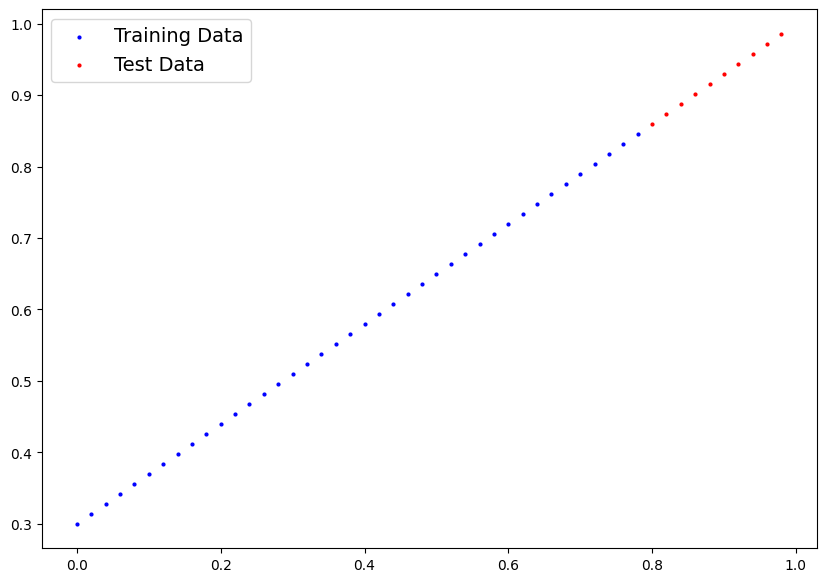

In [7]:
plot_predictions()

## 2. Build model

What our model does:
* Start with random values (weight, bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the  weight & bias values we used to create the data)

How odes it do so?

Though two main algorithms:
1. Gradient descent
2. Backpropagation  

(Pytorch like to work with **float32**)

In [8]:
from torch import nn

#  create linear regressio model class
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch, inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is  linear regression formula



### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should out model try and learn , often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural networ modules, if you subclass itg, you should overwrite forward()
* torch.optim -  this where the optimizers in PyTorch live, they will help with gradient descent (optimize the data (rather leave it as a random to better fit the model))
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

PyTorch cheat sheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now that we've created a model, let's see what's inside

we can check our model parameters or what's inside our model using `.parameters()`

In [9]:
#  Create a random seed
torch.manual_seed(42)

#  Create n instance of the model (this is  subclass of nn.module)
model_0 = LinearRegressionModel()

# checck out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias # => ideal value

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

when we pass dat through our model, it's going to run through the `forward()` method.



In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

`torch.inference_mode()` is used when using a model for inference (making predictions).
`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

In [14]:
#  Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do sth similar with torch.no_grad(), however inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

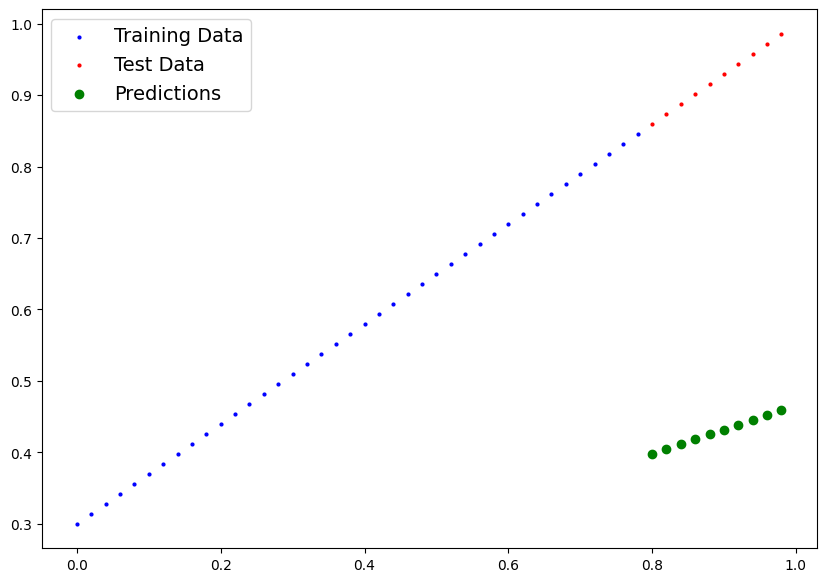

In [16]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in another words from a poor representation of thedata to a better representation of the data

One way to measure how poor or how wrong models predictions are is to use a loss function.

* Note: Loss functions may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:**  A function to measure how wrongyour models' predictions re to the ideal outputs, lower is better

* **Optimizer:** Take into account the loss of  model an adjusts the model's parameters (e.g., weight & bias in our case) to improe the lose function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

*Mean absolute error* (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use SGD, torch.optim.SGD(params, lr) where:

* `params` is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

* `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# check out our models' parameters (a parameter is  value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss()

#  setup and optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # Lr = learning rate = possibly the important hyperparameter you can set

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works andn what doesn't with your particular problem set

For example, for a regression problem (like ours), a loss functuons of `nn.L1Loss()` and an optimizer like torch.optim.SGD() will suffice

But for a classification problem like classifying whether a photo of a dog and a cat, you'll likely want to use a loss function of nn.BCELoss() (Binary cross entropy loss)

#  Building a training loop (or a testing loop) in PyTorch

 a couple of things we need in a training loop:
  0. Loop trough the dta
  1. Forward pass (this involves data moving through our model's `forward()`)  function to make a prediction on data - also called forward propagation
  2. Calculted the loss (compare forwrd pass predictions to ground truth labels
  3. Optimizer zero grad
  4. Loss backward - move backward through the network to calculate the gradients of each parameters of our model with respect to the losses (**backpropagation**)
  5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent (or a slope)**)

  we need gradient descent to be zero

In [20]:
torch.manual_seed(42)
# an epoch is one loop trough the data... this is a hyperparameter because we've set it overselves
epochs = 201

# trach different values
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass (predictions)
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step thr optimizer  (perform grdient descent)
  # update optimizer value (so that, the training value will go near the the true value on each loop of epoch)
  # by default, how the optimizer changes will accumulate through the loop so...
  # we have to zero them above in step 3 for the next itertion of the
  optimizer.step()

  # Testing
  # turns off different settings in the model not needed
  # for evaluation/testing (dropout, batch norm layers)
  model_0.eval()
  # turns off gradient tracking  & a couple more things behind the scenes
  with torch.inference_mode(): # inference_mode() == torch.no_grad() but better
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happened
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [21]:
epoch_count, train_loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  t

In [22]:
train_loss_values[0].detach().numpy()

array(0.31288138, dtype=float32)

In [23]:
# another way to change from tensor with grad_fn to numpy:
import numpy as np
train_loss_values = torch.tensor(train_loss_values).detach().cpu().numpy()
train_loss_values
# np.array(torch.tensor(train_loss_values).detach().cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
       0.00893248], dtype=float32)

In [24]:
# x = 0
# for data in train_loss_values:
#   train_loss_values[x] = data.detach().numpy()
#   x = x + 1

# train_loss_values

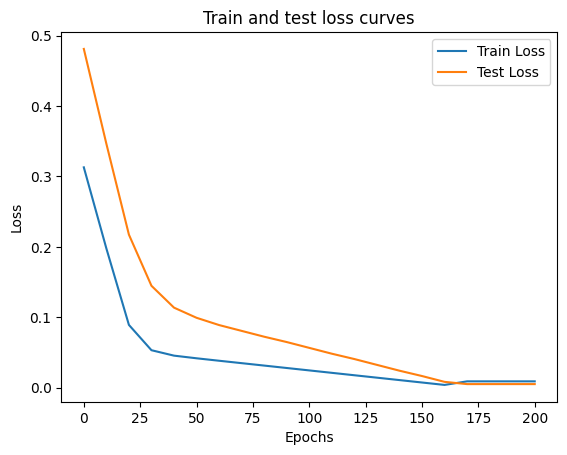

In [25]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title('Train and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [26]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [27]:
list(model_0.state_dict()), model_0.state_dict()

(['weights', 'bias'],
 OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]))

In [28]:
weight, bias

(0.7, 0.3)

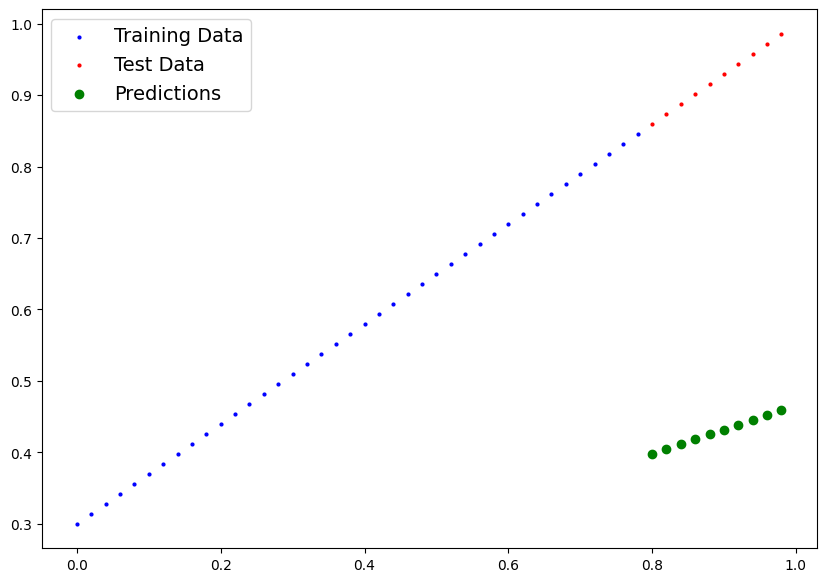

In [29]:
plot_predictions(predictions=y_preds)

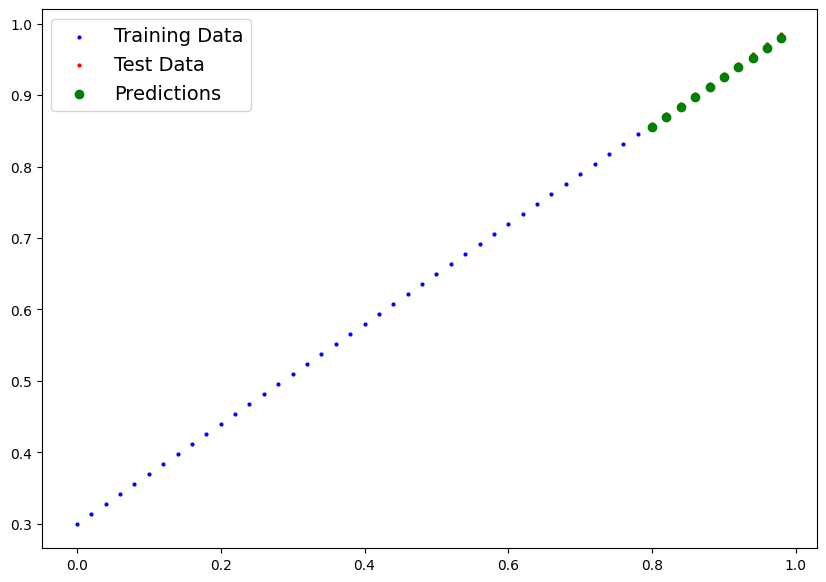

In [30]:
plot_predictions(predictions=y_preds_new)

## **Saving a model in PyTorch**

There are three main methods you should know about in PyTorch.

1. `torch.save()` : allows you to save a PyTorch object in Python's pickle format
(serialize (save) and deserialize (load))

2. `torch.load()` : allows you to load a saved Python object

3. `torch.nn.Module.load_state_dict()` : this allows to load a model's saved state dictionary (ex., model_0.state_dict() => which contains parameters and values used for model)

In [31]:
#  Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state_dict
print(f'save to {MODEL_SAVE_PATH}')
torch.save(obj=model_0, f=MODEL_SAVE_PATH)

save to models/01_pytorch_workflow_model_0.pth


In [32]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1783 Sep 15 17:53 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model
Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [33]:
# state_dict_loadedmodel = torch.load(f=MODEL_SAVE_PATH)
# # To load in a saved state_dict, we have to instantiate a new instance of our model class
# loaded_model_0 = LinearRegressionModel()
# # Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
# loaded_model_0.load_state_dict(state_dict_loadedmodel)
loaded_model_0 = torch.load(f=MODEL_SAVE_PATH)
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [34]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [35]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [36]:
#  Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together
Let's go back through the steps above and see it all in one place

In [37]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.0.1+cu118'

### Create device-agnostic code.

This means of we got access to a GPU, our code will be used it (better performance), if no GPU is availble, then the code will default to CPU

In [38]:
#  Setup deviceagnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## 6.1 Data

In [39]:
# Create some data using the linear regression formula of y = bias + (weight * x)
weight = 0.7
bias   = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, error will popup
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [40]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

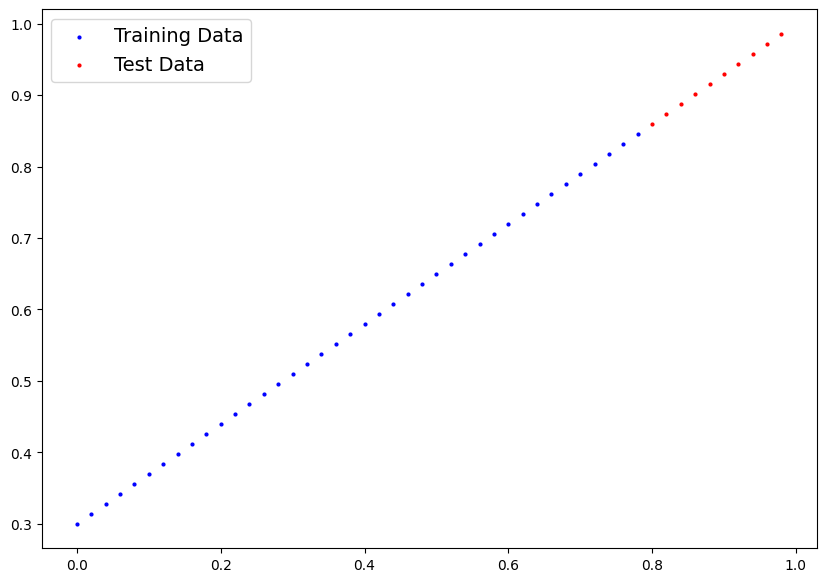

In [41]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded,
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [42]:
# Create a linear model by subclass nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) ->torch.Tensor():
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [43]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [44]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [45]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [46]:
#  Setup loss function
loss_fn = nn.L1Loss() # same as MAE
# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [47]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic ode for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test  = X_test.to(device)
y_test  = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [49]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluationg predictions

In [50]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [57]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

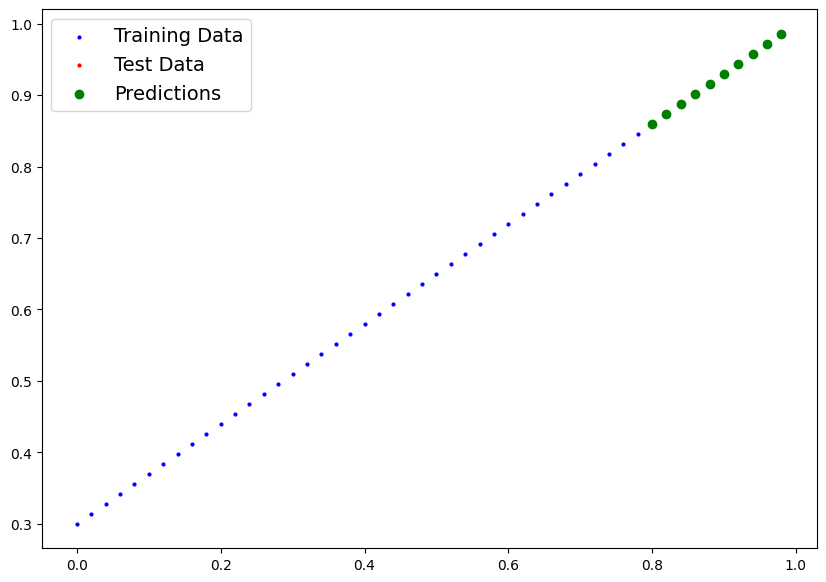

In [51]:
# Check out the model predictions visually
plot_predictions(predictions=y_preds.detach().cpu())

### 6.5 Saving & loading a trained model

In [52]:
#  Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state_dict
print(f'save to {MODEL_SAVE_PATH}')
torch.save(obj=model_0, f=MODEL_SAVE_PATH)

save to models/01_pytorch_workflow_model_1.pth


In [70]:
# Loading model
loaded_model_1 = torch.load(f=MODEL_SAVE_PATH)
loaded_model_1.to(device)

# loaded_model_1 = LinearRegressionModelV2()
# loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
# loaded_model_1.to(device)

LinearRegressionModel()

In [71]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [72]:
loaded_model_1.state_dict()

OrderedDict([('weights', tensor([0.6951], device='cuda:0')),
             ('bias', tensor([0.2993], device='cuda:0'))])

In [73]:
# Evaluaute loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]], device='cuda:0')